In [7]:
from joblib import load
from tqdm import tqdm

true_prob = []
size = 817
sample_to_read = []
with open('../../../../data/songda/truthful_qa//31/alpaca_7B_with_score.joblib', 'rb') as f:
    for i in tqdm(range(size)):
        try:
            data = load(f)
            true_prob.append(data['truth_prob'])
            sample_to_read.append(data)
        except EOFError:
            break
    


# Now 'data' contains the data loaded from the file
count = 0
for i in range(len(true_prob)):
    if true_prob[i] > 0.5:
        count += 1
print(count, len(sample_to_read))
for i in sample_to_read:
    print(i)




In [2]:
import pickle

def load_lists(filename):
    with open(filename, 'rb') as f:
        list1, list2, list_3 = pickle.load(f)
    return list1, list2, list_3

train_instance_1, val_instance_1, test_instance_1 = load_lists('31/hidden_states_GMM_200_1024_0.2.pkl')
train_instance_2, val_instance_2, test_instance_2 = load_lists('31/hidden_states_Grid_5_1024_0.2.pkl')
train_instance_3, val_instance_3, test_instance_3 = load_lists('31/hidden_states_KMeans_200_1024_0.2.pkl')


train_trace_1 = []
train_ground_truth_1 = []
test_trace_1 = []
test_ground_truth_1 = []
train_trace_2 = []
train_ground_truth_2 = []
test_trace_2 = []
test_ground_truth_2 = []
train_trace_3 = []
train_ground_truth_3 = []
test_trace_3 = []
test_ground_truth_3 = []

for i in train_instance_1:
    train_trace_1.append(i['state_trace'])
    train_ground_truth_1.append(i['binary_label'])
for i in test_instance_1:
    test_trace_1.append(i['state_trace'])
    test_ground_truth_1.append(i['binary_label'])
for i in train_instance_2:
    train_trace_2.append(i['state_trace'])
    train_ground_truth_2.append(i['binary_label'])
for i in test_instance_2:
    test_trace_2.append(i['state_trace'])
    test_ground_truth_2.append(i['binary_label'])
for i in train_instance_3:
    train_trace_3.append(i['state_trace'])
    train_ground_truth_3.append(i['binary_label'])
for i in test_instance_3:
    test_trace_3.append(i['state_trace'])
    test_ground_truth_3.append(i['binary_label'])

    



FileNotFoundError: [Errno 2] No such file or directory: '31/hidden_states_Grid_10_5_0.2.pkl'

In [4]:
from collections import Counter

def sliding_window(sequence, window_size):
    """Generate sub-sequences of window_size from sequence."""
    return [sequence[i : i + window_size] for i in range(len(sequence) - window_size + 1)]

def count_subsequences(traces, window_size):
    """Count the occurrence of each sub-sequence of window_size in traces."""
    counter = Counter()
    for trace in traces:
        for subsequence in sliding_window(trace, window_size):
            # Convert list of integers to a hashable type to count them
            subsequence_tuple = tuple(subsequence)
            counter[subsequence_tuple] += 1
    return counter

# Choose in-distribution and OOD traces
# Correct predicted one as in-distribution
in_distribution_traces = []
ood_distribution_traces = []
for i in train_instance_2:
    if i["binary_label"] == 1:
        in_distribution_traces.append(i["state_trace"])
    else:
        ood_distribution_traces.append(i["state_trace"])

# Choose a window size
window_size = 3

# Count sub-sequence occurrences
in_distribution_counts = count_subsequences(in_distribution_traces, window_size)
ood_counts = count_subsequences(ood_distribution_traces, window_size)

print("in_distribution_counts", in_distribution_counts)
print("ood_counts", ood_counts)

high_freq_pairs = [(subseq, count) for subseq, count in in_distribution_counts.items() if count > 50 and ood_counts[subseq] == 0]

# Sort the pairs by frequency in descending order
high_freq_pairs.sort(key=lambda x: x[1], reverse=True)

# Print the result
for subseq, count in high_freq_pairs:
    print(f"Sub-sequence: {subseq}, Frequency in ID: {count}")




in_distribution_counts Counter({(4, 3, 0): 370, (0, 1, 3): 360, (4, 4, 0): 331, (3, 0, 2): 291, (1, 3, 4): 290, (0, 2, 3): 261, (3, 4, 4): 203, (4, 0, 2): 199, (4, 0, 1): 193, (0, 2, 4): 187, (3, 0, 3): 187, (3, 3, 0): 184, (0, 1, 4): 174, (3, 4, 3): 174, (2, 3, 4): 163, (3, 0, 1): 157, (3, 4, 0): 151, (0, 3, 2): 146, (2, 4, 4): 141, (5, 3, 0): 140, (0, 2, 2): 133, (1, 4, 4): 126, (4, 4, 3): 125, (4, 0, 3): 120, (0, 3, 3): 116, (4, 5, 0): 114, (2, 3, 3): 111, (3, 5, 3): 109, (2, 0, 1): 103, (4, 4, 4): 102, (3, 0, 4): 99, (3, 5, 0): 95, (5, 4, 0): 93, (0, 4, 2): 93, (5, 0, 2): 88, (3, 3, 4): 86, (4, 0, 4): 85, (0, 2, 5): 84, (4, 2, 0): 82, (2, 3, 0): 82, (2, 3, 5): 81, (0, 3, 4): 81, (0, 3, 5): 75, (2, 2, 0): 75, (2, 0, 2): 74, (1, 3, 5): 72, (5, 0, 1): 72, (2, 4, 5): 70, (3, 2, 3): 70, (2, 0, 3): 70, (3, 2, 0): 69, (5, 4, 3): 67, (0, 4, 1): 67, (5, 3, 3): 65, (3, 4, 5): 65, (2, 5, 4): 64, (3, 5, 4): 64, (2, 2, 4): 64, (3, 3, 3): 63, (3, 0, 5): 63, (0, 5, 2): 63, (2, 2, 2): 62, (2, 2, 3

In [6]:
from collections import Counter

def eval(list_of_arrays, list_of_results):
    state_statics = {}
    # Iterate over the list_of_arrays and list_of_results
    for i in range(len(list_of_arrays)):
        # Get the array and corresponding result
        unique_array = set(list_of_arrays[i])
        result = list_of_results[i]
        for one_state in unique_array:
            if one_state not in state_statics:
                state_statics[one_state] = {'truth': 0, 'fake': 0}
            if result == 1:
                state_statics[one_state]['truth'] += 1
            else: 
                state_statics[one_state]['fake'] += 1

    fake_representation_prob = {}

    for one_state in state_statics:
        all_count = state_statics[one_state]["truth"] + state_statics[one_state]["fake"]
        prob = state_statics[one_state]["fake"] * 1. / all_count
        
        fake_representation_prob[one_state] = prob
    return fake_representation_prob, state_statics

# Get fake representation probability for each state
# fake_probs_1, state_statics_1 = eval(test_trace_1, test_ground_truth_1)
# fake_probs_2, state_statics_2 = eval(test_trace_2, test_ground_truth_2)
# fake_probs_3, state_statics_3 = eval(test_trace_3, test_ground_truth_3)
# fake_probs_4, state_statics_4 = eval(test_trace_4, test_ground_truth_4)
# fake_probs_5, state_statics_5 = eval(test_trace_5, test_ground_truth_5)

fake_probs_1_train, state_statics_1_train = eval(train_trace_1, train_ground_truth_1)
fake_probs_2_train, state_statics_2_train = eval(train_trace_2, train_ground_truth_2)
fake_probs_3_train, state_statics_3_train = eval(train_trace_3, train_ground_truth_3)
fake_probs_4_train, state_statics_4_train = eval(train_trace_4, train_ground_truth_4)
fake_probs_5_train, state_statics_5_train = eval(train_trace_5, train_ground_truth_5)


# print(fake_probs_1)

# total_value_number = len(fake_probs.keys())
# keys_greater_than_0_6 = [key for key, value in fake_probs.items() if value > 0.6]
# keys_greater_than_0_7 = [key for key, value in fake_probs.items() if value > 0.7]
# keys_greater_than_0_8 = [key for key, value in fake_probs.items() if value > 0.8]
# keys_greater_than_0_9 = [key for key, value in fake_probs.items() if value > 0.9]
# keys_equal_1 = [key for key, value in fake_probs.items() if value == 1]

# print(len(keys_greater_than_0_6) / total_value_number, keys_greater_than_0_6)
# print(len(keys_greater_than_0_7) / total_value_number, keys_greater_than_0_7)
# print(len(keys_greater_than_0_8) / total_value_number, keys_greater_than_0_8)
# print(len(keys_greater_than_0_9) / total_value_number, keys_greater_than_0_9)
# print(len(keys_equal_1) / 100, keys_equal_1)

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc

def get_roc_auc(fake_probs, test_trace, test_ground_truth):
    percentage_result = []
    for sentence in test_trace:
        # Map the sentence tokens to their fake probabilities
        sentence_probs = [fake_probs[token] for token in sentence]

        # Calculate the mean fake probability for the sentence
        mean_prob = sum(sentence_probs) / len(sentence_probs)

        # Classify the sentence as fake if mean_prob > 0.5, true otherwise
        percentage_result.append(mean_prob * (-1))

    # ROC AUC Score

    fpr, tpr, thresholds = roc_curve(test_ground_truth, percentage_result)
    roc_auc = auc(fpr, tpr)
    print(f'ROC AUC Score: {roc_auc}')
    return fpr, tpr, roc_auc

fpr_1, tpr_1, roc_auc_1 = get_roc_auc(fake_probs_1_train, test_trace_1, test_ground_truth_1)
fpr_2, tpr_2, roc_auc_2 = get_roc_auc(fake_probs_2_train, test_trace_2, test_ground_truth_2)
fpr_3, tpr_3, roc_auc_3 = get_roc_auc(fake_probs_3_train, test_trace_3, test_ground_truth_3)
fpr_4, tpr_4, roc_auc_4 = get_roc_auc(fake_probs_4_train, test_trace_4, test_ground_truth_4)
fpr_5, tpr_5, roc_auc_5 = get_roc_auc(fake_probs_5_train, test_trace_5, test_ground_truth_5)

fpr_1_train, tpr_1_train, roc_auc_1_train = get_roc_auc(fake_probs_1_train, train_trace_1, train_ground_truth_1)
fpr_2_train, tpr_2_train, roc_auc_2_train = get_roc_auc(fake_probs_2_train, train_trace_2, train_ground_truth_2)
fpr_3_train, tpr_3_train, roc_auc_3_train = get_roc_auc(fake_probs_3_train, train_trace_3, train_ground_truth_3)
fpr_4_train, tpr_4_train, roc_auc_4_train = get_roc_auc(fake_probs_4_train, train_trace_4, train_ground_truth_4)
fpr_5_train, tpr_5_train, roc_auc_5_train = get_roc_auc(fake_probs_5_train, train_trace_5, train_ground_truth_5)


# Plot ROC curve
# plt.figure()
# lw = 2
# plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic example')
# plt.legend(loc="lower right")
# plt.show()

ROC AUC Score: 0.43011750154607303
ROC AUC Score: 0.43011750154607303
ROC AUC Score: 0.43181818181818177
ROC AUC Score: 0.43011750154607303
ROC AUC Score: 0.43011750154607303
ROC AUC Score: 0.543431317915854
ROC AUC Score: 0.543500975202006
ROC AUC Score: 0.5433616606297018
ROC AUC Score: 0.5435183895235441
ROC AUC Score: 0.543483560880468


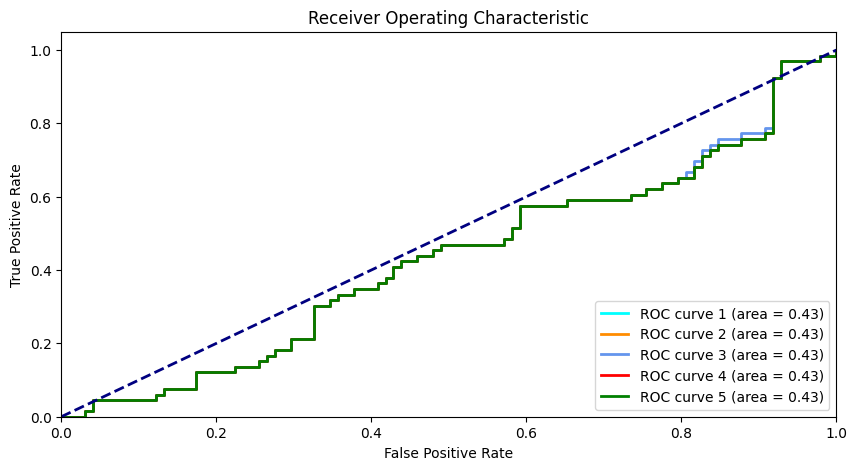

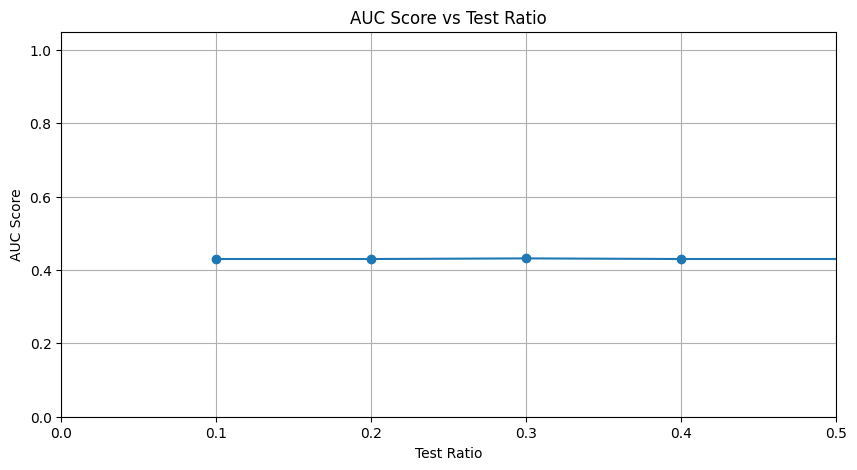

In [8]:
import matplotlib.pyplot as plt
# Create a list of test ratios
test_ratios = [0.1, 0.2, 0.3, 0.4, 0.8]

# Create a list of your roc_auc scores
roc_aucs = [roc_auc_1, roc_auc_2, roc_auc_3, roc_auc_4, roc_auc_5]

# Create a list of colors for your ROC curves
colors = ['aqua', 'darkorange', 'cornflowerblue', 'red', 'green']

# Create a list of your fpr and tpr values
fpr_values = [fpr_1, fpr_2, fpr_3, fpr_4, fpr_5]
tpr_values = [tpr_1, tpr_2, tpr_3, tpr_4, tpr_5]

plt.figure(figsize=(10,5))

# Plot each ROC curve
for i, color in zip(range(5), colors):
    plt.plot(fpr_values[i], tpr_values[i], color=color, lw=2, label=f'ROC curve {i+1} (area = %0.2f)' % roc_aucs[i])
    
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot the AUC scores
plt.figure(figsize=(10,5))
plt.plot(test_ratios, roc_aucs, marker='o')
plt.xlim([0.0, 0.5])
plt.ylim([0.0, 1.05])
plt.xlabel('Test Ratio')
plt.ylabel('AUC Score')
plt.title('AUC Score vs Test Ratio')
plt.grid(True)
plt.show()

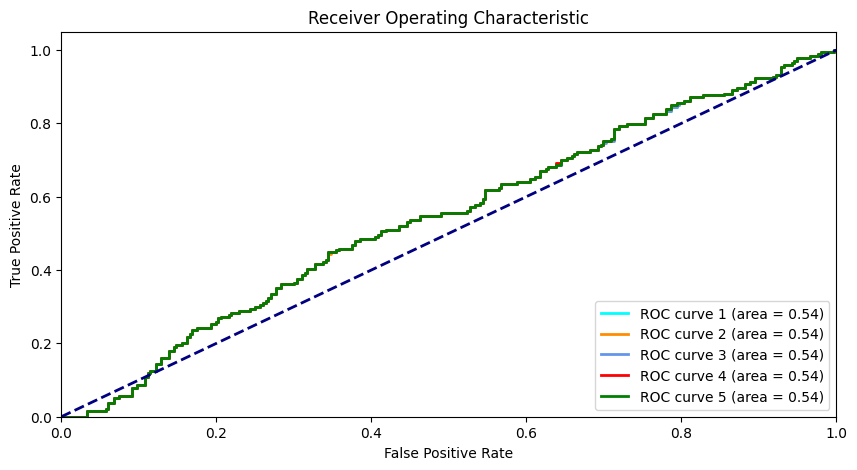

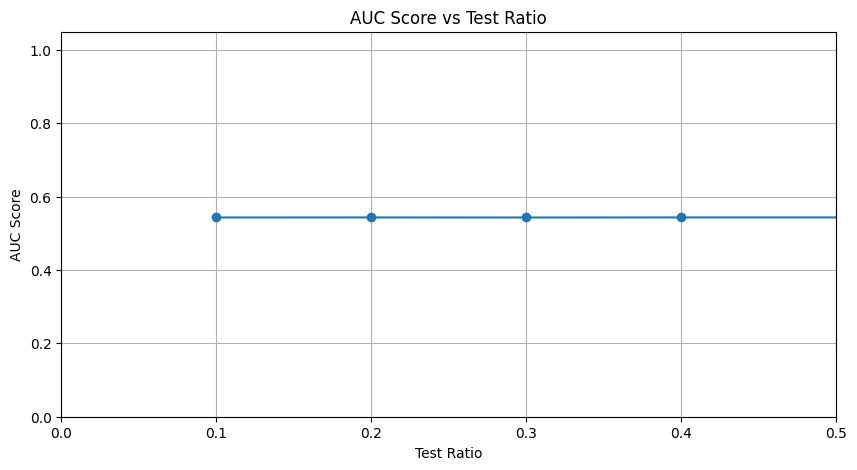

In [11]:
import matplotlib.pyplot as plt
# Create a list of test ratios
test_ratios = [0.1, 0.2, 0.3, 0.4, 0.8]

# Create a list of your roc_auc scores
roc_aucs = [roc_auc_1_train, roc_auc_2_train, roc_auc_3_train, roc_auc_4_train, roc_auc_5_train]

# Create a list of colors for your ROC curves
colors = ['aqua', 'darkorange', 'cornflowerblue', 'red', 'green']

# Create a list of your fpr and tpr values
fpr_values = [fpr_1_train, fpr_2_train, fpr_3_train, fpr_4_train, fpr_5_train]
tpr_values = [tpr_1_train, tpr_2_train, tpr_3_train, tpr_4_train, tpr_5_train]

plt.figure(figsize=(10,5))

# Plot each ROC curve
for i, color in zip(range(5), colors):
    plt.plot(fpr_values[i], tpr_values[i], color=color, lw=2, label=f'ROC curve {i+1} (area = %0.2f)' % roc_aucs[i])
    
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot the AUC scores
plt.figure(figsize=(10,5))
plt.plot(test_ratios, roc_aucs, marker='o')
plt.xlim([0.0, 0.5])
plt.ylim([0.0, 1.05])
plt.xlabel('Test Ratio')
plt.ylabel('AUC Score')
plt.title('AUC Score vs Test Ratio')
plt.grid(True)
plt.show()

In [14]:
# import pandas as pd
# import numpy as np

# def extract_features(arr):
#     # Feature extraction for each array
#     mean = np.mean(arr)
#     std = np.std(arr)
#     max_value = np.max(arr)
#     min_value = np.min(arr)
#     # ... add any other features you find useful

#     return [mean, std, max_value, min_value]

# # Extract features from each array and convert to pandas DataFrame
# features = np.array([extract_features(arr) for arr in loaded_list1])
# df = pd.DataFrame(features, columns=['mean', 'std', 'max', 'min'])
# df['label'] = loaded_list2

In [15]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc

# # Split into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(df.drop('label', axis=1), df['label'], test_size=0.2, random_state=42)

# # Initialize and train classifier
# classifier = LogisticRegression()
# classifier.fit(X_train, y_train)

# # Evaluate classifier
# score = classifier.score(X_test, y_test)
# print(f"Test accuracy: {score * 100}%")


In [16]:
# # Creating and training a Random Forest Classifier
# classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# classifier.fit(X_train, y_train)

# # Predicting on the testing set
# y_pred = classifier.predict(X_test)
# print(y_pred)
# print("Accuracy: ", accuracy_score(y_test, y_pred))

# # Confusion Matrix
# conf_matrix = confusion_matrix(y_test, y_pred)
# print(f'Confusion Matrix: \n{conf_matrix}')



In [17]:
# percentage_threshold = 0.7
# all_counts = 0
# fake_counts_in_truth = 0
# fake_counts_in_fake = 0
# # Iterate over test_trace to get the fake counts in truth and fake counts in fake
# for i, sentence in enumerate(test_trace):
#     is_exist = False
#     for j in range(len(sentence)):
#         if fake_probs[sentence[j]] > percentage_threshold:
#             if test_ground_truth[i] == 1:
#                 fake_counts_in_truth += 1
#             else:
#                 fake_counts_in_fake += 1
#         all_counts += 1

        
#     # else:
#     #     print("============EXCEPTION============")
# print(fake_counts_in_truth, fake_counts_in_fake, fake_counts_in_truth / all_counts, fake_counts_in_fake / all_counts)

In [18]:

# # Separating the states, truth and fake counts into separate lists
# states = list(state_statics.keys())
# truth_counts = [state_statics[state]['truth'] for state in states]
# fake_counts = [state_statics[state]['fake'] for state in states]

# # Creating the bar charts
# fig, axs = plt.subplots(2)

# # Bar chart for 'truth' counts
# axs[0].bar(states, truth_counts, color='b')
# axs[0].set_title('Truth Counts by State')
# axs[0].set_xlabel('States')
# axs[0].set_ylabel('Truth Counts')

# # Bar chart for 'fake' counts
# axs[1].bar(states, fake_counts, color='r')
# axs[1].set_title('Fake Counts by State')
# axs[1].set_xlabel('States')
# axs[1].set_ylabel('Fake Counts')

# # Automatically adjust the subplot layout
# fig.tight_layout()

# plt.show()